In [1]:

!pip install pandas numpy matplotlib seaborn scikit-learn


In [2]:
from google.colab import files
files.upload()  # Upload the kaggle.json file here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fatenbouchiba","key":"e5a14e70eb0172a5d482260f92370fc2"}'}

In [3]:
import os
# Create a directory for the Kaggle API key
os.makedirs('/root/.kaggle', exist_ok=True)

# Move the uploaded file to the correct directory
!mv kaggle.json /root/.kaggle/

# Set the appropriate permissions
!chmod 600 /root/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d bumba5341/advertisingcsv


Dataset URL: https://www.kaggle.com/datasets/bumba5341/advertisingcsv
License(s): unknown
  0% 0.00/2.26k [00:00<?, ?B/s]
100% 2.26k/2.26k [00:00<00:00, 6.00MB/s]


In [5]:
import zipfile
with zipfile.ZipFile('advertisingcsv.zip', 'r') as zip_ref:
    zip_ref.extractall()

# Check if the files are extracted
!ls


Advertising.csv  advertisingcsv.zip  sample_data


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Advertising.csv')
df.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


<Axes: >

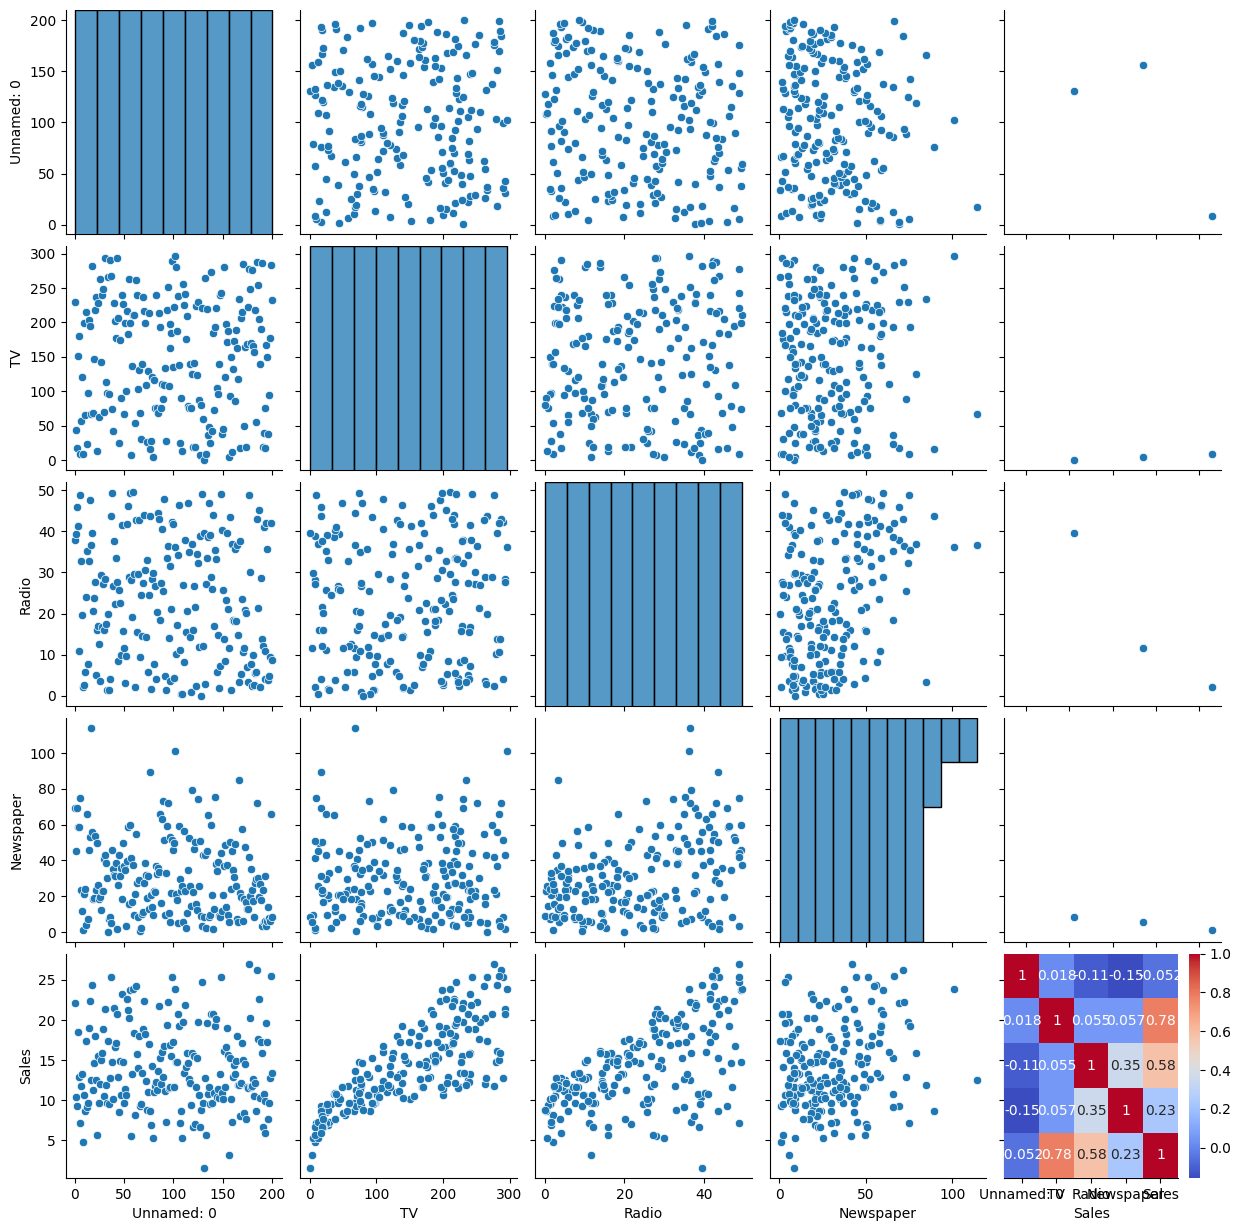

In [8]:
import seaborn as sns
# Check for missing values
df.isnull().sum()

# Visualize the distribution of the data
sns.pairplot(df)

# Check correlation between features
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


In [11]:
# Check for any missing values
df.fillna(0, inplace=True)  # Fill missing values with 0 or handle them as needed

# Define features (X) and target (y)
X = df[['TV', 'Radio', 'Newspaper']]  # Features: Advertising spending in different media
y = df['Sales']  # Target: Sales

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [13]:
# Calculate and print evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Absolute Error: 1.4607567168117603
Mean Squared Error: 3.1740973539761033
R² Score: 0.899438024100912


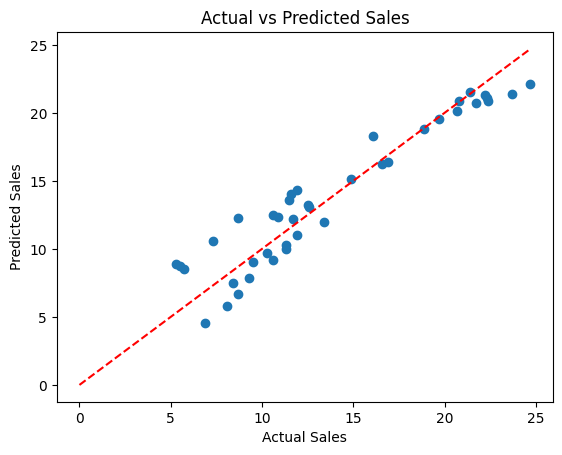

In [14]:
# Plot actual vs predicted sales
plt.scatter(y_test, y_pred)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Absolute Error: {mae_rf}")
print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R² Score: {r2_rf}")


Random Forest - Mean Absolute Error: 0.6200999999999988
Random Forest - Mean Squared Error: 0.5907322499999988
Random Forest - R² Score: 0.9812843792541843


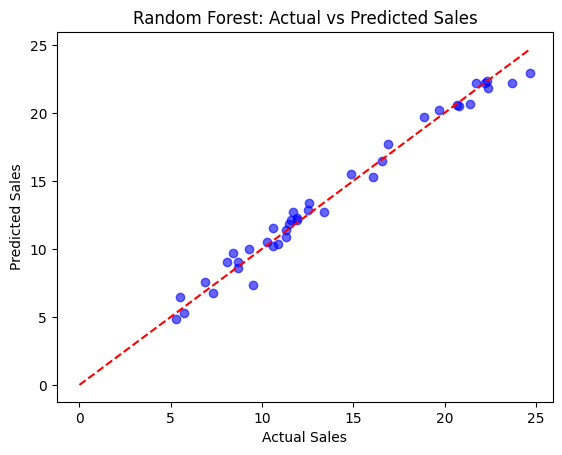

In [17]:
# Actual vs Predicted Sales Plot
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.6)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Random Forest: Actual vs Predicted Sales')
plt.show()


In [16]:
# Feature importance
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


     Feature  Importance
0         TV    0.624810
1      Radio    0.362201
2  Newspaper    0.012989


In [18]:
X_reduced = df[['TV', 'Radio']]  # Exclude 'Newspaper'
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

rf_model_reduced = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_reduced.fit(X_train_reduced, y_train)

y_pred_rf_reduced = rf_model_reduced.predict(X_test_reduced)
reduced_r2 = r2_score(y_test, y_pred_rf_reduced)
print(f"R² Score (Reduced Features): {reduced_r2}")


R² Score (Reduced Features): 0.9864091117634538


In [19]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='r2', verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_

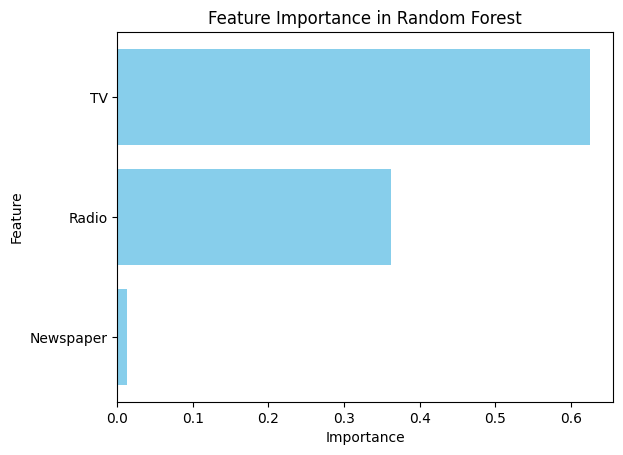

In [20]:
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()  # Flip the order for better readability
plt.show()


In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict sales on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 0.6200999999999988
Mean Squared Error (MSE): 0.5907322499999988
R² Score: 0.9812843792541843


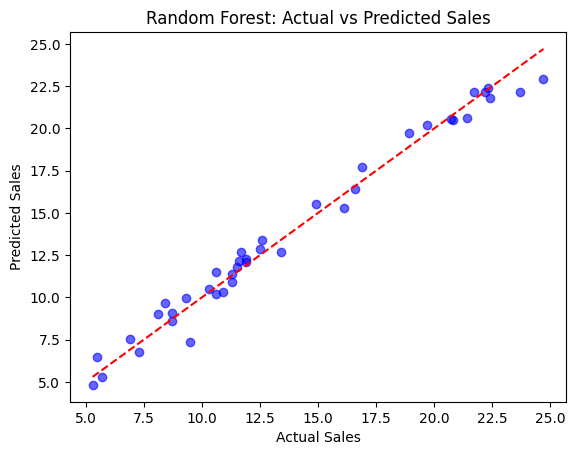

In [22]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_rf, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Random Forest: Actual vs Predicted Sales')
plt.show()


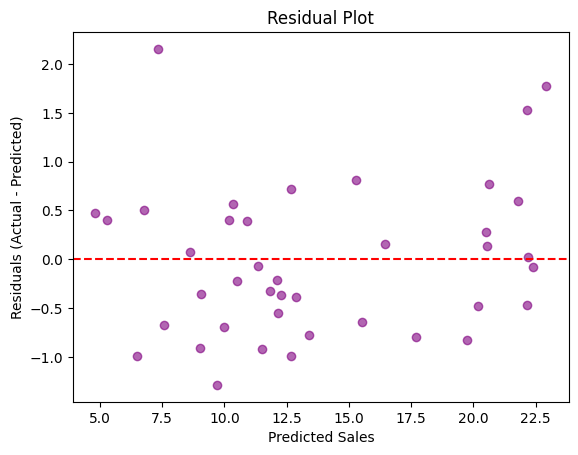

In [23]:
residuals = y_test - y_pred_rf
plt.scatter(y_pred_rf, residuals, alpha=0.6, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.show()


In [25]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Average R² Score: {cv_scores.mean()}")


Cross-Validation R² Scores: [0.97963787 0.98713243 0.96755874 0.96154361 0.9817051 ]
Average R² Score: 0.9755155497962253


In [26]:
import joblib

# Save the model
joblib.dump(rf_model, 'random_forest_model.pkl')

# Load the model later
loaded_model = joblib.load('random_forest_model.pkl')
